In [18]:
%matplotlib inline
import json
import random
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.spatial.distance import cosine
from sklearn.decomposition import PCA

In [19]:
# Create the data frame and read in data 
df=pd.read_csv('forbes.csv')
df = df.fillna(0)

#Clean the data frame for only neccesary items 
clean_df=df.loc[:,['name','net_worth','age','Bachelor']]
clean_df = clean_df.set_index('name')
clean_df.head(25)

,net_worth,age,Bachelor
name,,,
Bernard Arnault & family,211.0,74.0,1.0
Elon Musk,180.0,51.0,1.0
Jeff Bezos,114.0,59.0,1.0
Larry Ellison,107.0,78.0,0.0
Warren Buffett,106.0,92.0,1.0
Bill Gates,104.0,67.0,0.0
Michael Bloomberg,94.5,81.0,1.0
Carlos Slim Helu & family,93.0,83.0,1.0
Mukesh Ambani,83.4,65.0,1.0


In [20]:
# Create Target 
row_position = 'Jeff Bezos'
specific_row = clean_df.loc[row_position]

print(specific_row)

net_worth    114.0
age           59.0
Bachelor       1.0
Name: Jeff Bezos, dtype: float64


In [21]:
#Computing the euclidean distance 
target = specific_row  

columns_to_compare = ['net_worth', 'age', 'Bachelor']

distances = [distance.euclidean(target[columns_to_compare], row[columns_to_compare]) for _, row in clean_df.iterrows()]

query_distances = list(zip(clean_df.index, distances))

top_10_rows = sorted(query_distances, key=lambda x: x[1])[:10]

for index, distance in top_10_rows:
    net_worth = clean_df.loc[index, 'net_worth']
    age = clean_df.loc[index, 'age']
    education_status = clean_df.loc[index, 'Bachelor']
    print("Name:", index, "Net Worth:", net_worth, "Age:", age, "Education Status:", education_status, "Distance:", distance)


Name: Jeff Bezos Net Worth: 114.0 Age: 59.0 Education Status: 1.0 Distance: 0.0
Name: Bill Gates Net Worth: 104.0 Age: 67.0 Education Status: 0.0 Distance: 12.84523257866513
Name: Larry Ellison Net Worth: 107.0 Age: 78.0 Education Status: 0.0 Distance: 20.273134932713294
Name: Michael Bloomberg Net Worth: 94.5 Age: 81.0 Education Status: 1.0 Distance: 29.3981291921782
Name: Mukesh Ambani Net Worth: 83.4 Age: 65.0 Education Status: 1.0 Distance: 31.182687504447074
Name: Carlos Slim Helu & family Net Worth: 93.0 Age: 83.0 Education Status: 1.0 Distance: 31.89043743820395
Name: Warren Buffett Net Worth: 106.0 Age: 92.0 Education Status: 1.0 Distance: 33.95585369269929
Name: Steve Ballmer Net Worth: 80.7 Age: 67.0 Education Status: 1.0 Distance: 34.247481659240286
Name: Francoise Bettencourt Meyers & family Net Worth: 80.5 Age: 69.0 Education Status: 0.0 Distance: 34.97499106504532
Name: Larry Page Net Worth: 79.2 Age: 50.0 Education Status: 1.0 Distance: 35.94495792180038


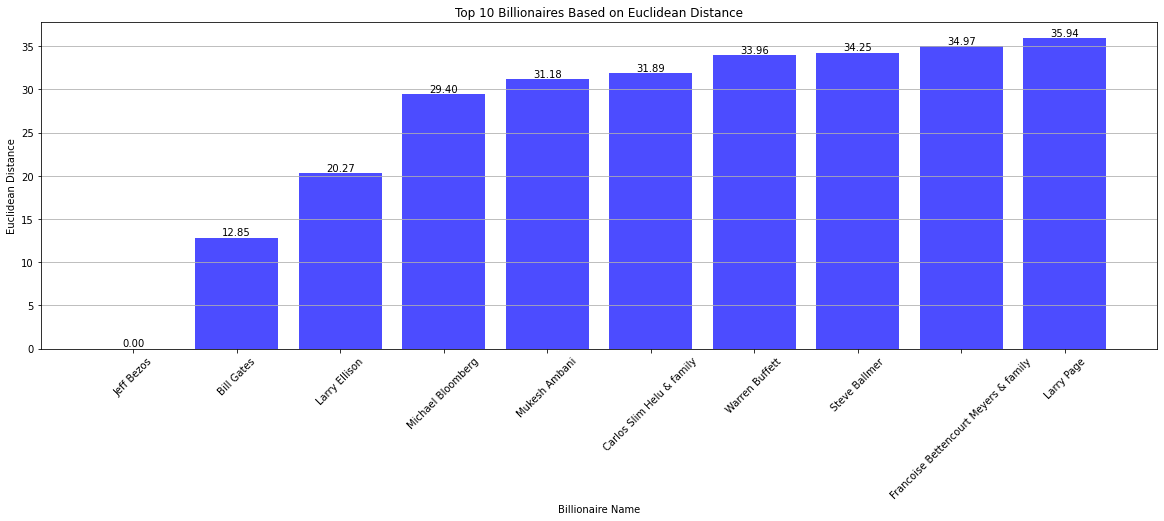

In [22]:
# Create a bar graph 
names = [index for index, _ in top_10_rows]
distances = [distance for _, distance in top_10_rows]

plt.figure(figsize=(20, 6))
plt.bar(names, distances, color='blue', alpha=0.7)

for name, distance in zip(names, distances):
    plt.text(name, distance, f'{distance:.2f}', ha='center', va='bottom')

plt.title('Top 10 Billionaires Based on Euclidean Distance')
plt.xlabel('Billionaire Name')
plt.ylabel('Euclidean Distance')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [23]:
# Compute the cosine simularity 
target = specific_row

columns_to_compare = ['net_worth', 'age', 'Bachelor']

similarities = [1 - cosine(target[columns_to_compare], row[columns_to_compare]) for _, row in clean_df.iterrows()]
query_similarities = list(zip(clean_df.index, similarities))

top_10_similarities = sorted(query_similarities, key=lambda x: x[1], reverse=True)[:10]

for index, similarity in top_10_similarities:
    net_worth = clean_df.loc[index, 'net_worth']
    age = clean_df.loc[index, 'age']
    education_status = clean_df.loc[index, 'Bachelor']
    print("Name:", index, "Net Worth:", net_worth, "Age:", age, "Education Status:", education_status, "Cosine Similarity:", similarity)


Name: Jeff Bezos Net Worth: 114.0 Age: 59.0 Education Status: 1.0 Cosine Similarity: 1
Name: Mark Zuckerberg Net Worth: 64.4 Age: 38.0 Education Status: 0.0 Cosine Similarity: 0.9984301841959602
Name: Larry Page Net Worth: 79.2 Age: 50.0 Education Status: 1.0 Cosine Similarity: 0.9963396487955429
Name: Bill Gates Net Worth: 104.0 Age: 67.0 Education Status: 0.0 Cosine Similarity: 0.9954867484367398
Name: Sergey Brin Net Worth: 76.0 Age: 49.0 Education Status: 1.0 Cosine Similarity: 0.9954781471870682
Name: Bernard Arnault & family Net Worth: 211.0 Age: 74.0 Education Status: 1.0 Cosine Similarity: 0.9901723374981095
Name: Larry Ellison Net Worth: 107.0 Age: 78.0 Education Status: 0.0 Cosine Similarity: 0.9883913046744489
Name: Mukesh Ambani Net Worth: 83.4 Age: 65.0 Education Status: 1.0 Cosine Similarity: 0.9830363250748785
Name: Elon Musk Net Worth: 180.0 Age: 51.0 Education Status: 1.0 Cosine Similarity: 0.9797679926253519
Name: Steve Ballmer Net Worth: 80.7 Age: 67.0 Education Stat

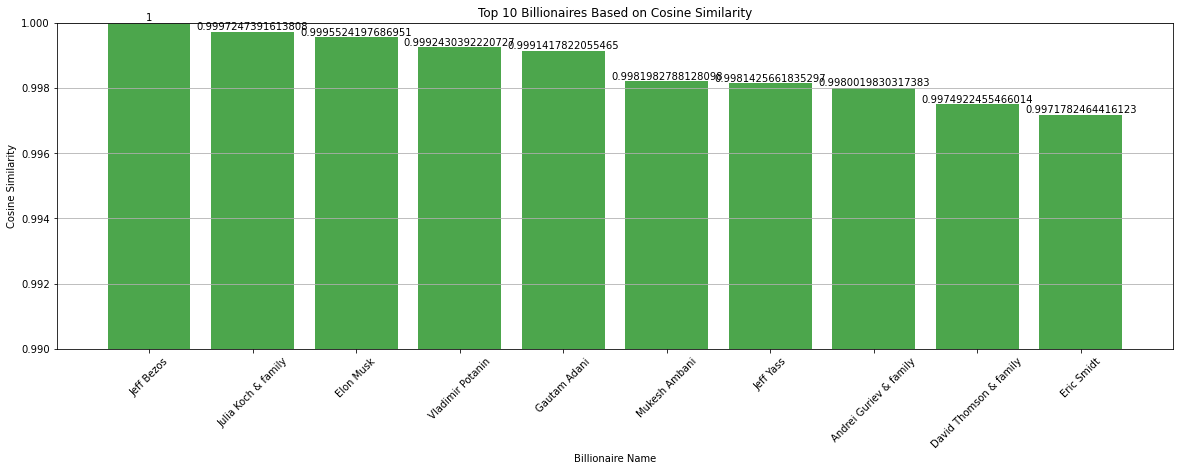

In [27]:
# Create a bar graph
names = [index for index, _ in top_10_similarities]
similarities = [similarity for _, similarity in top_10_similarities]


plt.figure(figsize=(20, 6))
plt.bar(names, similarities, color='green', alpha=0.7)


for name, similarity in zip(names, similarities):
    plt.text(name, similarity, f'{similarity}', ha='center', va='bottom')
    
plt.title('Top 10 Billionaires Based on Cosine Similarity')
plt.xlabel('Billionaire Name')
plt.ylabel('Cosine Similarity')
plt.xticks(rotation=45)
plt.ylim(0.99, 1.0)
plt.grid(axis='y')
plt.show()

In [25]:
#Compute the PCA dimesionality reduction 
target = specific_row


columns_to_compare = ['net_worth', 'age', 'Bachelor']

pca = PCA(n_components=2)
clean_df_reduced = pca.fit_transform(clean_df[columns_to_compare])

target_reduced = pca.transform(target[columns_to_compare].values.reshape(1, -1))

similarities = [1 - cosine(target_reduced, row) for row in clean_df_reduced]

query_similarities = list(zip(clean_df.index, similarities))

top_10_similarities = sorted(query_similarities, key=lambda x: x[1], reverse=True)[:10]

names = [index for index, _ in top_10_similarities]
similarities = [similarity for _, similarity in top_10_similarities]

for index, similarity in zip(names, similarities):
    print("Name:", index, "Net Worth:", net_worth, "Age:", age, "Education Status:", education_status,"Dimensionality Reduction-PCA", similarity)


Name: Jeff Bezos Net Worth: 80.7 Age: 67.0 Education Status: 1.0 Dimensionality Reduction-PCA 1
Name: Julia Koch & family Net Worth: 80.7 Age: 67.0 Education Status: 1.0 Dimensionality Reduction-PCA 0.9997247391613808
Name: Elon Musk Net Worth: 80.7 Age: 67.0 Education Status: 1.0 Dimensionality Reduction-PCA 0.9995524197686951
Name: Vladimir Potanin Net Worth: 80.7 Age: 67.0 Education Status: 1.0 Dimensionality Reduction-PCA 0.9992430392220727
Name: Gautam Adani Net Worth: 80.7 Age: 67.0 Education Status: 1.0 Dimensionality Reduction-PCA 0.9991417822055465
Name: Mukesh Ambani Net Worth: 80.7 Age: 67.0 Education Status: 1.0 Dimensionality Reduction-PCA 0.9981982788128098
Name: Jeff Yass Net Worth: 80.7 Age: 67.0 Education Status: 1.0 Dimensionality Reduction-PCA 0.9981425661835297
Name: Andrei Guriev & family Net Worth: 80.7 Age: 67.0 Education Status: 1.0 Dimensionality Reduction-PCA 0.9980019830317383
Name: David Thomson & family Net Worth: 80.7 Age: 67.0 Education Status: 1.0 Dimens

/Users/grahamalbers/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


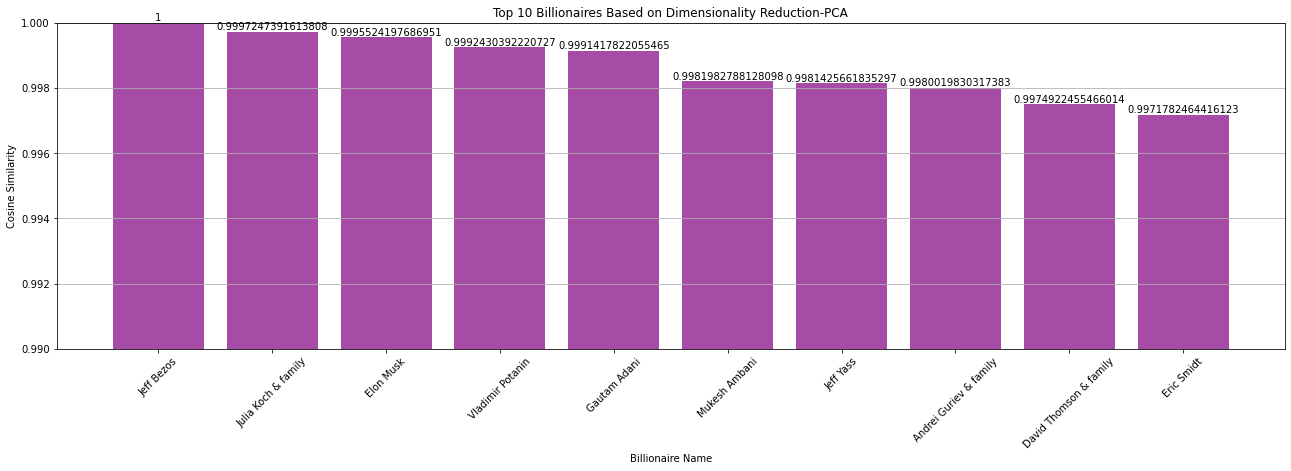

In [26]:
# Create a bar graph
plt.figure(figsize=(22, 6))
plt.bar(names, similarities, color='purple', alpha=0.7)

for name, similarity in zip(names, similarities):
    plt.text(name, similarity, f'{similarity}', ha='center', va='bottom')

plt.title('Top 10 Billionaires Based on Dimensionality Reduction-PCA')
plt.xlabel('Billionaire Name')
plt.ylabel('Cosine Similarity')
plt.xticks(rotation=45)
plt.ylim(0.99, 1.0)  # Set y-axis scale
plt.grid(axis='y')
plt.show()